In [28]:
%load_ext autoreload
%autoreload 2

In [4]:
import pandas as pd

pd.options.display.max_colwidth = 500

compute_samples = pd.read_csv('../sourmash/lung_cancer_v4/compute/samples.csv')
print(compute_samples.shape)
compute_samples.head()

/home/ubuntu/anaconda/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/home/ubuntu/anaconda/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


(5054, 10)


,id,read1,read2,name,output,trim_low_abundance_kmers,dna,protein,ksizes,scaled
0,A10_B000419_S34,s3://czbiohub-seqbot/fastqs/180516_A00111_0149_AH5CM2DSXX/rawdata/A10_B000419_S34/A10_B000419_S34_R1_001.fastq.gz,s3://czbiohub-seqbot/fastqs/180516_A00111_0149_AH5CM2DSXX/rawdata/A10_B000419_S34/A10_B000419_S34_R2_001.fastq.gz,A10_B000419_S34,s3://olgabot-maca/lung_cancer/sourmash_v4/A10_B000419_S34.signature,True,True,True,"21,27,33,51",1000
1,A10_B000420_S82,s3://czbiohub-seqbot/fastqs/180516_A00111_0149_AH5CM2DSXX/rawdata/A10_B000420_S82/A10_B000420_S82_R1_001.fastq.gz,s3://czbiohub-seqbot/fastqs/180516_A00111_0149_AH5CM2DSXX/rawdata/A10_B000420_S82/A10_B000420_S82_R2_001.fastq.gz,A10_B000420_S82,s3://olgabot-maca/lung_cancer/sourmash_v4/A10_B000420_S82.signature,True,True,True,"21,27,33,51",1000
2,A10_B002073_S166,s3://czbiohub-seqbot/fastqs/180516_A00111_0149_AH5CM2DSXX/rawdata/A10_B002073_S166/A10_B002073_S166_R1_001.fastq.gz,s3://czbiohub-seqbot/fastqs/180516_A00111_0149_AH5CM2DSXX/rawdata/A10_B002073_S166/A10_B002073_S166_R2_001.fastq.gz,A10_B002073_S166,s3://olgabot-maca/lung_cancer/sourmash_v4/A10_B002073_S166.signature,True,True,True,"21,27,33,51",1000
3,A10_B002078_S202,s3://czbiohub-seqbot/fastqs/180516_A00111_0149_AH5CM2DSXX/rawdata/A10_B002078_S202/A10_B002078_S202_R1_001.fastq.gz,s3://czbiohub-seqbot/fastqs/180516_A00111_0149_AH5CM2DSXX/rawdata/A10_B002078_S202/A10_B002078_S202_R2_001.fastq.gz,A10_B002078_S202,s3://olgabot-maca/lung_cancer/sourmash_v4/A10_B002078_S202.signature,True,True,True,"21,27,33,51",1000
4,A10_B002095_S118,s3://czbiohub-seqbot/fastqs/180516_A00111_0149_AH5CM2DSXX/rawdata/A10_B002095_S118/A10_B002095_S118_R1_001.fastq.gz,s3://czbiohub-seqbot/fastqs/180516_A00111_0149_AH5CM2DSXX/rawdata/A10_B002095_S118/A10_B002095_S118_R2_001.fastq.gz,A10_B002095_S118,s3://olgabot-maca/lung_cancer/sourmash_v4/A10_B002095_S118.signature,True,True,True,"21,27,33,51",1000


In [16]:
prefix = 's3://olgabot-maca/lung_cancer/sourmash_search/tabula-muris-k51-protein'
txt = 'lung_cancer_sourmash_search.txt'

! aws s3 ls $prefix/ > $txt
! cat $txt

2018-09-20 22:57:30    6946710 D1_B003125_S25_ignore-abundance=False.csv
2018-09-21 01:41:34    6948400 E19_B003570_S199_ignore-abundance=False.csv
2018-09-20 23:57:46    6936877 G10_B003586_S142_ignore-abundance=False.csv
2018-09-20 22:59:39    6939393 G9_B003511_S57_ignore-abundance=False.csv
2018-09-21 00:19:23    6935710 H7_B003588_S211_ignore-abundance=False.csv
2018-09-20 23:11:15    6947459 I22_B002095_S22_ignore-abundance=False.csv
2018-09-21 00:30:46    6956092 I3_B003573_S63_ignore-abundance=False.csv
2018-09-21 00:29:30    6948876 J11_B003573_S95_ignore-abundance=False.csv
2018-09-20 23:03:48    6938459 J8_B003528_S224_ignore-abundance=False.csv
2018-09-20 23:19:30    6939320 L16_B003588_S16_ignore-abundance=False.csv
2018-09-20 23:28:39    6938562 L5_B003588_S5_ignore-abundance=False.csv
2018-09-21 01:28:11    6946021 M1_B000420_S61_ignore-abundance=False.csv
2018-09-20 20:34:10         30 M23_B002097_S251_ignore-abundance=True.csv
2018-09-21 01:40:05    6942587 N15_B000420

In [17]:
aws_s3_ls = pd.read_table(txt, 
                          delim_whitespace=True, header=None, 
                          names=['date', 'time', 'bytes', 'basename'])
print(aws_s3_ls.shape)
aws_s3_ls.head()

(17, 4)


,date,time,bytes,basename
0,2018-09-20,22:57:30,6946710,D1_B003125_S25_ignore-abundance=False.csv
1,2018-09-21,01:41:34,6948400,E19_B003570_S199_ignore-abundance=False.csv
2,2018-09-20,23:57:46,6936877,G10_B003586_S142_ignore-abundance=False.csv
3,2018-09-20,22:59:39,6939393,G9_B003511_S57_ignore-abundance=False.csv
4,2018-09-21,00:19:23,6935710,H7_B003588_S211_ignore-abundance=False.csv


In [18]:
df = pd.read_csv(f'{prefix}/D1_B003125_S25_ignore-abundance=False.csv')
print(df.shape)
df.head()

(36295, 4)


,similarity,name,filename,md5
0,0.316674,cell_ontology_class:T_cell|tissue:Fat|subtissue:MAT|free_annotation:nan|cell_id:G16-MAA000914-3_9_M-1-1,tabula-muris-k51-protein,7eaedc3ea86056aca4353152544cfff4
1,0.308141,cell_ontology_class:T_cell|tissue:Fat|subtissue:MAT|free_annotation:nan|cell_id:E11-MAA000914-3_9_M-1-1,tabula-muris-k51-protein,9c2251f947b9a9faf1cad898f2b1a0a1
2,0.307184,cell_ontology_class:T_cell|tissue:Fat|subtissue:MAT|free_annotation:nan|cell_id:D12-MAA000914-3_9_M-1-1,tabula-muris-k51-protein,942b9c25aed5b57d64572cdcbd8d3343
3,0.304018,cell_ontology_class:endothelial_cell|tissue:Fat|subtissue:MAT|free_annotation:nan|cell_id:D17-MAA000914-3_9_M-1-1,tabula-muris-k51-protein,5e9de85eef4edef22566bb3eb1efc23b
4,0.302058,cell_ontology_class:T_cell|tissue:Fat|subtissue:MAT|free_annotation:nan|cell_id:H14-MAA000914-3_9_M-1-1,tabula-muris-k51-protein,2e4adc68cd4fd8e1c6119571c859ca71


In [21]:
pattern = '(?P<sample_id>[\w]+)_ignore-abundance=(?P<ignore_abundance>True|False).csv'

sample_id_abundance = aws_s3_ls.basename.str.extract(pattern)
print(sample_id_abundance.shape)
sample_id_abundance.head()

(17, 2)


,sample_id,ignore_abundance
0,D1_B003125_S25,False
1,E19_B003570_S199,False
2,G10_B003586_S142,False
3,G9_B003511_S57,False
4,H7_B003588_S211,False


In [73]:
sorted(sample_id_abundance.sample_id.values)

['D1_B003125_S25',
 'E19_B003570_S199',
 'G10_B003586_S142',
 'G9_B003511_S57',
 'H7_B003588_S211',
 'I22_B002095_S22',
 'I3_B003573_S63',
 'J11_B003573_S95',
 'J8_B003528_S224',
 'L16_B003588_S16',
 'L5_B003588_S5',
 'M1_B000420_S61',
 'M23_B002097_S251',
 'N15_B000420_S99',
 'O3_B003573_S207',
 'P14_B000420_S146',
 'P2_B003125_S14']

In [22]:
aws_s3_ls_ids = pd.concat([aws_s3_ls, sample_id_abundance], axis=1)
aws_s3_ls_ids.head()

,date,time,bytes,basename,sample_id,ignore_abundance
0,2018-09-20,22:57:30,6946710,D1_B003125_S25_ignore-abundance=False.csv,D1_B003125_S25,False
1,2018-09-21,01:41:34,6948400,E19_B003570_S199_ignore-abundance=False.csv,E19_B003570_S199,False
2,2018-09-20,23:57:46,6936877,G10_B003586_S142_ignore-abundance=False.csv,G10_B003586_S142,False
3,2018-09-20,22:59:39,6939393,G9_B003511_S57_ignore-abundance=False.csv,G9_B003511_S57,False
4,2018-09-21,00:19:23,6935710,H7_B003588_S211_ignore-abundance=False.csv,H7_B003588_S211,False


In [59]:
dfs = []

for i, row in aws_s3_ls_ids.iterrows():
    basename = row.basename
    
    sample_id = basename.split()
    df = pd.read_csv(f'{prefix}/{basename}')
    df['query_sample_id'] = row.sample_id
    df['ignore_abundance'] = row.ignore_abundance
    dfs.append(df)
search_results = pd.concat(dfs, ignore_index=True)
print(search_results.shape)
search_results.head()

(582787, 6)


,similarity,name,filename,md5,query_sample_id,ignore_abundance
0,0.316674,cell_ontology_class:T_cell|tissue:Fat|subtissue:MAT|free_annotation:nan|cell_id:G16-MAA000914-3_9_M-1-1,tabula-muris-k51-protein,7eaedc3ea86056aca4353152544cfff4,D1_B003125_S25,False
1,0.308141,cell_ontology_class:T_cell|tissue:Fat|subtissue:MAT|free_annotation:nan|cell_id:E11-MAA000914-3_9_M-1-1,tabula-muris-k51-protein,9c2251f947b9a9faf1cad898f2b1a0a1,D1_B003125_S25,False
2,0.307184,cell_ontology_class:T_cell|tissue:Fat|subtissue:MAT|free_annotation:nan|cell_id:D12-MAA000914-3_9_M-1-1,tabula-muris-k51-protein,942b9c25aed5b57d64572cdcbd8d3343,D1_B003125_S25,False
3,0.304018,cell_ontology_class:endothelial_cell|tissue:Fat|subtissue:MAT|free_annotation:nan|cell_id:D17-MAA000914-3_9_M-1-1,tabula-muris-k51-protein,5e9de85eef4edef22566bb3eb1efc23b,D1_B003125_S25,False
4,0.302058,cell_ontology_class:T_cell|tissue:Fat|subtissue:MAT|free_annotation:nan|cell_id:H14-MAA000914-3_9_M-1-1,tabula-muris-k51-protein,2e4adc68cd4fd8e1c6119571c859ca71,D1_B003125_S25,False


In [60]:
pattern = '(?P<column>\w+):(?P<value>[\w-]+)'

df = search_results.name.head().str.extractall(pattern)
df.reset_index().pivot(index='level_0', columns='column', values='value')

column,cell_id,cell_ontology_class,free_annotation,subtissue,tissue
level_0,,,,,
0,G16-MAA000914-3_9_M-1-1,T_cell,nan,MAT,Fat
1,E11-MAA000914-3_9_M-1-1,T_cell,nan,MAT,Fat
2,D12-MAA000914-3_9_M-1-1,T_cell,nan,MAT,Fat
3,D17-MAA000914-3_9_M-1-1,endothelial_cell,nan,MAT,Fat
4,H14-MAA000914-3_9_M-1-1,T_cell,nan,MAT,Fat


In [61]:
%%file extract_metadata.py
import pandas as pd


def extract_cell_metadata(columns,  pattern='(?P<column>\w+):(?P<value>[\w-]+)'):
    extracted = pd.Series(columns).str.extractall(pattern)
    cell_metadata = extracted.reset_index().pivot(
        index='level_0', columns='column', values='value')
    return cell_metadata


def to_key_value_pair(attribute):
    if len(attribute) > 1:
        try:
            return attribute[0], int(attribute[1])
        except ValueError:
            return attribute[0], attribute[1] 
    else:
        return 'comparison_sequence', attribute[0]



def extract_experiment_metadata(basename):
    key = basename.split('.csv')[0]
    split = key.split('_')
    attributes = [x.split('=') for x in split]
    attributes = dict(to_key_value_pair(x) for x in attributes)
    return key, attributes

Overwriting extract_metadata.py


In [62]:
import extract_metadata

cell_metadata = extract_metadata.extract_cell_metadata(search_results.name)
print(cell_metadata.shape)
cell_metadata.head()

(472231, 5)


column,cell_id,cell_ontology_class,free_annotation,subtissue,tissue
level_0,,,,,
0,G16-MAA000914-3_9_M-1-1,T_cell,nan,MAT,Fat
1,E11-MAA000914-3_9_M-1-1,T_cell,nan,MAT,Fat
2,D12-MAA000914-3_9_M-1-1,T_cell,nan,MAT,Fat
3,D17-MAA000914-3_9_M-1-1,endothelial_cell,nan,MAT,Fat
4,H14-MAA000914-3_9_M-1-1,T_cell,nan,MAT,Fat


In [63]:
search_results_metadata = search_results.join(cell_metadata)
print(search_results_metadata.shape)
search_results_metadata.head()

(582787, 11)


,similarity,name,filename,md5,query_sample_id,ignore_abundance,cell_id,cell_ontology_class,free_annotation,subtissue,tissue
0,0.316674,cell_ontology_class:T_cell|tissue:Fat|subtissue:MAT|free_annotation:nan|cell_id:G16-MAA000914-3_9_M-1-1,tabula-muris-k51-protein,7eaedc3ea86056aca4353152544cfff4,D1_B003125_S25,False,G16-MAA000914-3_9_M-1-1,T_cell,nan,MAT,Fat
1,0.308141,cell_ontology_class:T_cell|tissue:Fat|subtissue:MAT|free_annotation:nan|cell_id:E11-MAA000914-3_9_M-1-1,tabula-muris-k51-protein,9c2251f947b9a9faf1cad898f2b1a0a1,D1_B003125_S25,False,E11-MAA000914-3_9_M-1-1,T_cell,nan,MAT,Fat
2,0.307184,cell_ontology_class:T_cell|tissue:Fat|subtissue:MAT|free_annotation:nan|cell_id:D12-MAA000914-3_9_M-1-1,tabula-muris-k51-protein,942b9c25aed5b57d64572cdcbd8d3343,D1_B003125_S25,False,D12-MAA000914-3_9_M-1-1,T_cell,nan,MAT,Fat
3,0.304018,cell_ontology_class:endothelial_cell|tissue:Fat|subtissue:MAT|free_annotation:nan|cell_id:D17-MAA000914-3_9_M-1-1,tabula-muris-k51-protein,5e9de85eef4edef22566bb3eb1efc23b,D1_B003125_S25,False,D17-MAA000914-3_9_M-1-1,endothelial_cell,nan,MAT,Fat
4,0.302058,cell_ontology_class:T_cell|tissue:Fat|subtissue:MAT|free_annotation:nan|cell_id:H14-MAA000914-3_9_M-1-1,tabula-muris-k51-protein,2e4adc68cd4fd8e1c6119571c859ca71,D1_B003125_S25,False,H14-MAA000914-3_9_M-1-1,T_cell,nan,MAT,Fat


/home/ubuntu/anaconda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


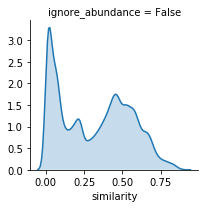

In [64]:
import seaborn as sns
%matplotlib inline

g = sns.FacetGrid(search_results, col='ignore_abundance')
g.map(sns.kdeplot, 'similarity', shade=True)

In [65]:
search_results.query('similarity > 0.5')

,similarity,name,filename,md5,query_sample_id,ignore_abundance
36295,0.546124,cell_ontology_class:enterocyte_of_epithelium_of_large_intestine|tissue:Large_Intestine|subtissue:Proximal|free_annotation:Enterocyte_(Proximal)|cell_id:G14-MAA001871-3_39_F-1-1,tabula-muris-k51-protein,c6c5a26cf141729b1d9d1d565d8a108c,E19_B003570_S199,False
36296,0.546072,cell_ontology_class:Brush_cell_of_epithelium_proper_of_large_intestine|tissue:Large_Intestine|subtissue:Proximal|free_annotation:Tuft_cell|cell_id:I5-MAA001872-3_39_F-1-1,tabula-muris-k51-protein,bf940c2db9c54477ab6b02d1a0f9c0d7,E19_B003570_S199,False
36297,0.545626,cell_ontology_class:epithelial_cell_of_large_intestine|tissue:Large_Intestine|subtissue:Proximal|free_annotation:Lgr5-_amplifying_undifferentiated_cell|cell_id:C2-MAA001871-3_39_F-1-1,tabula-muris-k51-protein,3b2a4dc62beb039cc88529b4dbfda827,E19_B003570_S199,False
36298,0.545288,cell_ontology_class:epithelial_cell_of_large_intestine|tissue:Large_Intestine|subtissue:Proximal|free_annotation:Lgr5-_amplifying_undifferentiated_cell|cell_id:H6-MAA001871-3_39_F-1-1,tabula-muris-k51-protein,3c5b05b218dc4bfdc197426bc838fed8,E19_B003570_S199,False
36299,0.545147,cell_ontology_class:epithelial_cell_of_large_intestine|tissue:Large_Intestine|subtissue:Proximal|free_annotation:Lgr5-_undifferentiated_cell|cell_id:J8-MAA001872-3_39_F-1-1,tabula-muris-k51-protein,2eefc7ec05c2b43b0c47b029d9e91c95,E19_B003570_S199,False
36300,0.545015,cell_ontology_class:epithelial_cell_of_large_intestine|tissue:Large_Intestine|subtissue:Proximal|free_annotation:Lgr5-_amplifying_undifferentiated_cell|cell_id:P9-MAA001871-3_39_F-1-1,tabula-muris-k51-protein,794f3fa75f80c9a50648167abf685116,E19_B003570_S199,False
36301,0.544963,cell_ontology_class:epithelial_cell_of_large_intestine|tissue:Large_Intestine|subtissue:Proximal|free_annotation:Lgr5-_amplifying_undifferentiated_cell|cell_id:L9-MAA001872-3_39_F-1-1,tabula-muris-k51-protein,216016101562ba5aaa8a4314bdc168f5,E19_B003570_S199,False
36302,0.544768,cell_ontology_class:epithelial_cell_of_large_intestine|tissue:Large_Intestine|subtissue:Distal|free_annotation:Lgr5-_amplifying_undifferentiated_cell|cell_id:D5-MAA001875-3_39_F-1-1,tabula-muris-k51-protein,3a77126b2f7c3c4e0c406ea1579664f0,E19_B003570_S199,False
36303,0.544635,cell_ontology_class:epithelial_cell_of_large_intestine|tissue:Large_Intestine|subtissue:Proximal|free_annotation:Lgr5-_amplifying_undifferentiated_cell|cell_id:L11-MAA001872-3_39_F-1-1,tabula-muris-k51-protein,53e75fc224e384b1dedcf05b20b99938,E19_B003570_S199,False
36304,0.544629,cell_ontology_class:myeloid_cell|tissue:Fat|subtissue:MAT|free_annotation:nan|cell_id:H11-B002314-3_56_F-1-1,tabula-muris-k51-protein,3117952b86d451cb92e6336531316c17,E19_B003570_S199,False


In [70]:
grouped = search_results_metadata.groupby('query_sample_id')

grouped.apply(lambda x: x.nlargest(5, 'similarity'))

similarity  \
query_sample_id                       
D1_B003125_S25   0         0.316674   
                 1         0.308141   
                 2         0.307184   
                 3         0.304018   
                 4         0.302058   
E19_B003570_S199 36295     0.546124   
                 36296     0.546072   
                 36297     0.545626   
                 36298     0.545288   
                 36299     0.545147   
G10_B003586_S142 72822     0.674244   
                 72823     0.668282   
                 72824     0.666516   
                 72825     0.665505   
                 72826     0.663183   
G9_B003511_S57   108964    0.438570   
                 108965    0.437140   
                 108966    0.429399   
                 108967    0.420542   
                 108968    0.420251   
H7_B003588_S211  145076    0.891271   
                 145077    0.889722   
                 145078    0.889588   
                 145079    0.888009   
                 145080    0.887346   
I22_B002095_S22  181541    0.592673   
                 181542    0.592599   
                 181543    0.592340   
                 181544    0.592095   
                 181545    0.591839   
...                             ...   
L5_B003588_S5    364166    0.889970   
                 364167    0.888685   
                 364168    0.888425   
                 364169    0.886891   
                 364170    0.886377   
M1_B000420_S61   400663    0.614689   
                 400664    0.613387   
                 400665    0.613202   
                 400666    0.611927   
                 400667    0.611687   
N15_B000420_S99  437219    0.752688   
                 437220    0.752443   
                 437221    0.751850   
                 437222    0.751796   
                 437223    0.751449   
O3_B003573_S207  473762    0.625473   
                 473763    0.625237   
                 473764    0.625093   
                 473765    0.625009   
                 473766    0.624919   
P14_B000420_S146 510186    0.704126   
                 510187    0.704124   
                 510188    0.704096   
                 510189    0.703480   
                 510190    0.703317   
P2_B003125_S14   546743    0.238055   
                 546744    0.238045   
                 546745    0.238027   
                 546746    0.237953   
                 546747    0.237952   

                                                                                                                                                                                                            name  \
query_sample_id                                                                                                                                                                                                    
D1_B003125_S25   0                                                                                       cell_ontology_class:T_cell|tissue:Fat|subtissue:MAT|free_annotation:nan|cell_id:G16-MAA000914-3_9_M-1-1   
                 1                                                                                       cell_ontology_class:T_cell|tissue:Fat|subtissue:MAT|free_annotation:nan|cell_id:E11-MAA000914-3_9_M-1-1   
                 2                                                                                       cell_ontology_class:T_cell|tissue:Fat|subtissue:MAT|free_annotation:nan|cell_id:D12-MAA000914-3_9_M-1-1   
                 3                                                                             cell_ontology_class:endothelial_cell|tissue:Fat|subtissue:MAT|free_annotation:nan|cell_id:D17-MAA000914-3_9_M-1-1   
                 4                                                                                       cell_ontology_class:T_cell|tissue:Fat|subtissue:MAT|free_annotation:nan|cell_id:H14-MAA000914-3_9_M-1-1   
E19_B003570_S199 36295          cell_ontology_class:enterocyte_of_epithelium_of_lar

In [ ]:
import seaborn as sns
%matplotlib inline

g = sns.FacetGrid(search_results, col='ignore_abundance')
g.map(sns.kdeplot, 'similarity', shade=True)